# Pre-processing and synchronizing ephys data: an example notebook

The objective of this notebook is to be able to take all the output files that are generated by the ephys setup and Ronan cottage and synchronizing all of them to the same clock.

We are using session S20230323 from BRAC4779.2a [HELMET], the first session we recorded. 

## Running list of things ot improve on

- As a small note, we have to re-write the bonsai workflow to record the cameras in the arena in a convincing way, so that it inherits the name from the stimulus workflow ideally, like in Yiran's case. Work on that. 
- The outputs should all go to the same recording folder if they're part of the same recording. Like in Yiran's case. 

In [33]:
from pathlib import Path
import cottage_analysis.io_module.onix as onix
import cottage_analysis.io_module.harp as harp
from matplotlib import pyplot as plt

session = Path('/camp/lab/znamenskiyp/data/instruments/raw_data/projects/blota_onix_pilote/BRAC7449.2a/S20230323')

## Which files were outputted this time?

- Three different folders and some loose files 
    - Outputs of the AcquireEphys
    - Outputs of stimulus
    - Outputs of HF cameras
    - Outputs of FM cameras

In [2]:
ephys = session / 'R115806'
stimulus = session / 'R115817_SpheresPermTubeReward'
headfixed_cam = session / 'R115821_BRAC7449.2a'

## Importing the ephys outputs (rhd2164)

Ephys outputs start with rhd2164, which is the intan digital electrophysiology interface chip on the headstage. There are three files created, one is aux, one is clock, one is ephys and one is first_time. 

Antonin wrote a function which takes them all together and makes a memmap object with them, so that they can be easily accessed. 

In [3]:
processed_ephys = onix.load_rhd2164(ephys)
processed_ephys

{'first_time': '2023-03-23T11:58:06.1912960+00:00',
 'clock': memmap([        1890,        10210,        18512, ..., 511840213096,
         511840221417, 511840229720], dtype=uint64),
 'ephys': memmap([[ 9586,  9370,  9332, ..., 32705, 32675, 32674],
         [13307, 13004, 12731, ..., 32759, 32791, 32861],
         [10940, 10663, 10583, ..., 32828, 32741, 32781],
         ...,
         [10953, 10742, 10602, ..., 32614, 32658, 32678],
         [15063, 14717, 14392, ..., 32656, 32684, 32764],
         [13215, 13023, 13003, ..., 32701, 32637, 32764]], dtype=uint16),
 'aux': memmap([[56956, 58838, 56956, ..., 58314,   621, 54549],
         [16288, 16288, 16288, ..., 16291, 16292, 16291],
         [45446, 41682, 40427, ..., 62281, 63849, 61967],
         [16300, 16300, 16300, ..., 16306, 16306, 16306],
         [24727, 32536, 32536, ..., 18874, 18874, 18874],
         [15943, 15942, 15942, ..., 15937, 15937, 15937]], dtype=uint16),
 'hubsynccounter': memmap([    1079872,     1081272,     1

## Loading lighthouse data (ts4231)

Three different lighthouse-generated files, one per diode. ts4231 is the name of the photodiode

In [4]:
processed_photodiode = onix.load_ts4231(ephys)
processed_photodiode

{2:                                timestamp         clock         x         y  \
 0      2023-03-23T11:58:06.3336448+00:00      17844015  0.251915  0.108775   
 1      2023-03-23T11:58:06.3885312+00:00      26158154  0.251847  0.108646   
 2      2023-03-23T11:58:06.4301184+00:00      34467086  0.251878  0.108721   
 3      2023-03-23T11:58:06.4851584+00:00      42781198  0.251843  0.108702   
 4      2023-03-23T11:58:06.5358080+00:00      51100646  0.251835  0.108745   
 ...                                  ...           ...       ...       ...   
 29571  2023-03-23T12:32:18.6834560+00:00  511796018303  0.219194  0.179626   
 29572  2023-03-23T12:32:18.7276160+00:00  511812558322  0.212413  0.175876   
 29573  2023-03-23T12:32:18.7530240+00:00  511820872517  0.208419  0.174579   
 29574  2023-03-23T12:32:18.7766784+00:00  511829181399  0.204346  0.173979   
 29575  2023-03-23T12:32:18.7981952+00:00  511837495612  0.200559  0.173492   
 
               z  
 0     -0.678530  
 1     -0

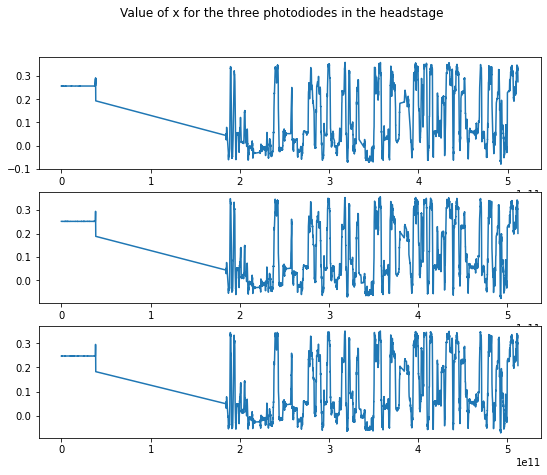

In [24]:
fig, axs = plt.subplots(3, 1, figsize = (9, 7))

fig.suptitle('Value of x for the three photodiodes in the headstage')
axs[0].plot(processed_photodiode[1]['clock'], processed_photodiode[1]['x'])
axs[1].plot(processed_photodiode[2]['clock'], processed_photodiode[2]['x'])
axs[2].plot(processed_photodiode[3]['clock'], processed_photodiode[3]['x'])


## Loading IMU data (bno055)

We have nothing to load the IMU data. Should I write it?

In [34]:
processed_bno = onix.load_bno055(ephys)
processed_bno

AttributeError: module 'cottage_analysis.io_module.onix' has no attribute 'load_bno055'

## Loading the stimulus logs and synchronizing them to the ephys clock

## Loading the freely moving cameras and synchronizing them to the ephys clock

## Loading the head-fixed cameras and synchronizing them to the ephys clock